## Final Project for Introduction to Machine Learning
### Merve ÇALIŞKAN
#### 09/01/2021

## Data

In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading the file
data = pd.read_csv("winequality.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
#Getting information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [142]:
#Describing the data for each feature
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [143]:
#Analysing missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [144]:
data.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Data Analysis

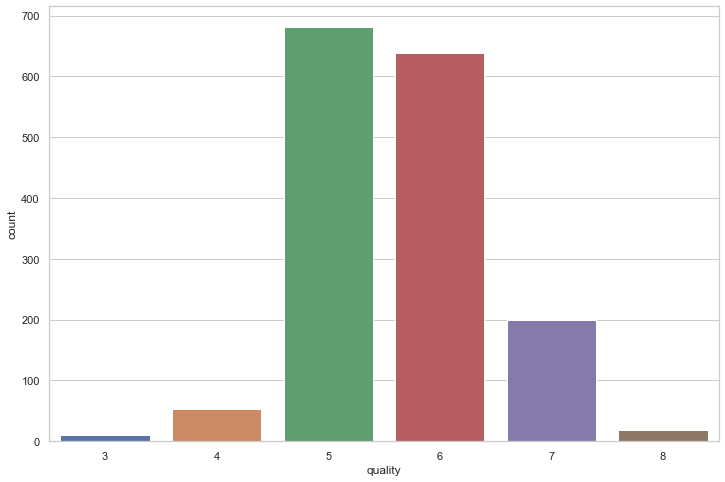

In [145]:
#Label distribution using seaborn.countplot()
plt.figure(figsize=(12, 8))
sns.countplot(x ='quality', data = data)
plt.show()

c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

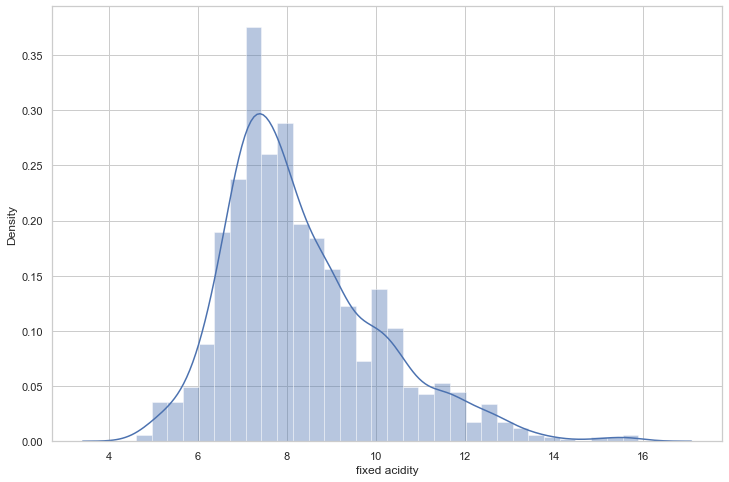

In [146]:
#EDA using distplot
plt.figure(figsize=(12, 8))
sns.distplot(data["fixed acidity"])

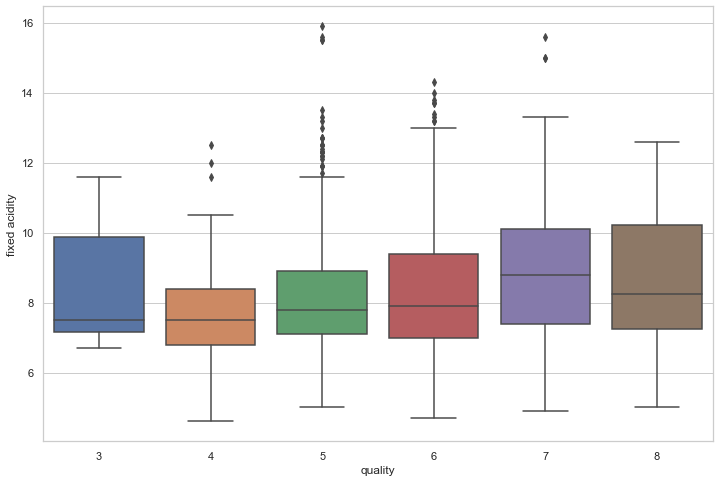

In [147]:
#EDA using boxplot
plt.figure(figsize=(12, 8))
sns.boxplot( x=data["quality"], y=data["fixed acidity"]);
plt.show()

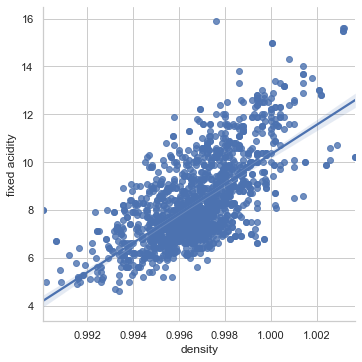

In [148]:
#EDA using lmplot
sns.lmplot(x='density', y='fixed acidity', data=data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

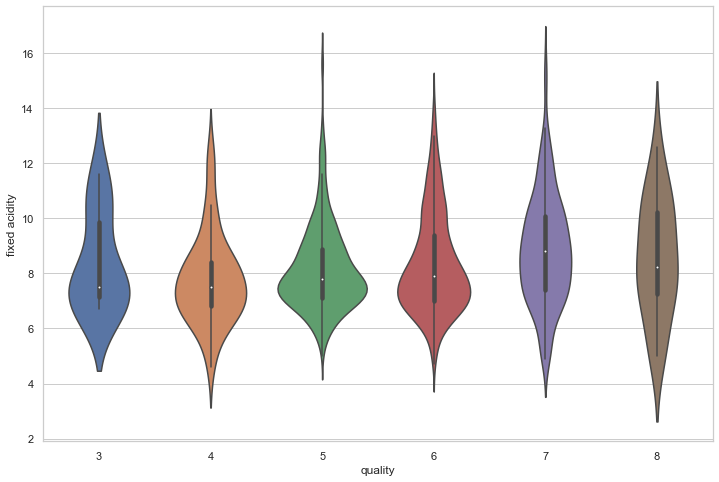

In [149]:
#EDA using violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='fixed acidity', data=data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

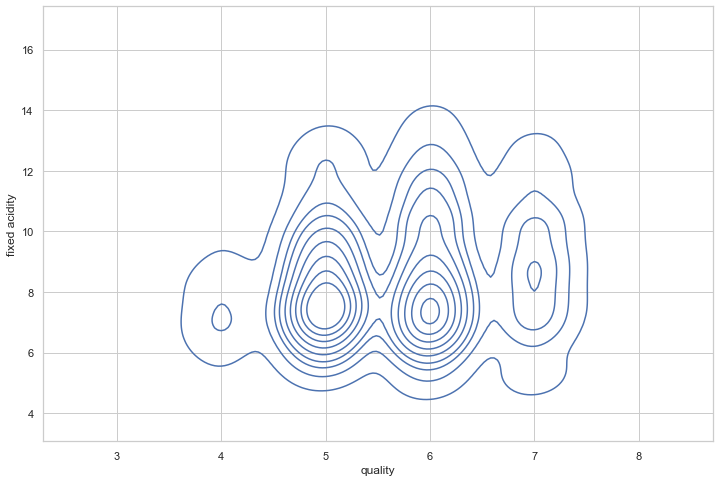

In [150]:
#EDA using kdeplot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='quality', y='fixed acidity', data=data)

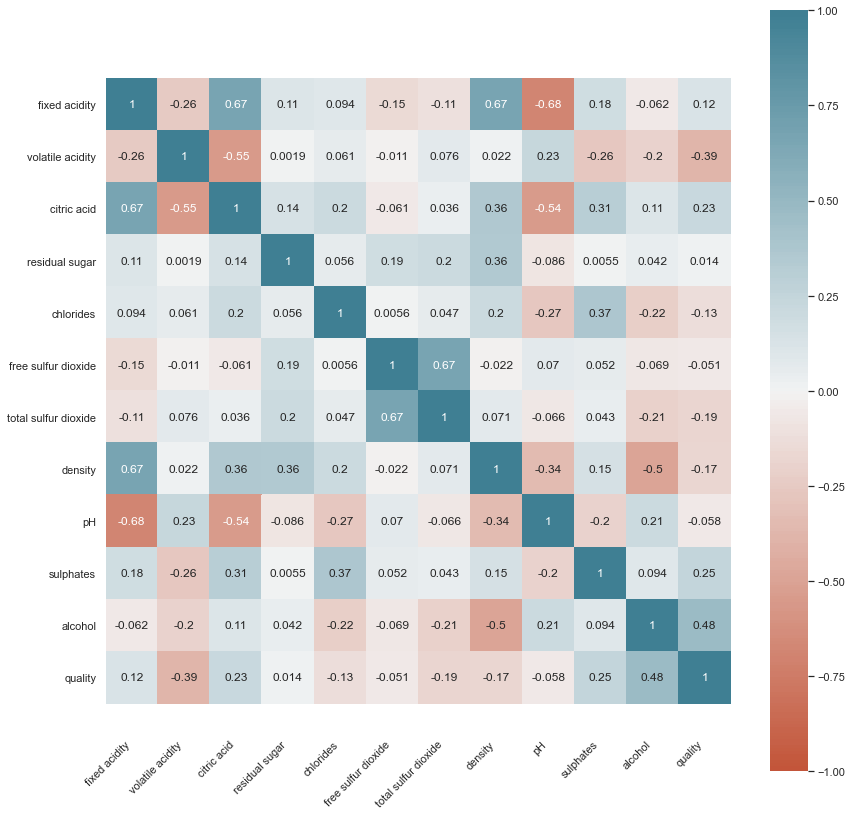

In [151]:
#Correlation of the features
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

## Preprocessing

In [152]:
#Cleaning duplicate values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [153]:
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


There are **240 duplicates** to be removed.

In [154]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [155]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

148

In [156]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [157]:
# Model building
from sklearn import preprocessing
X = data.drop(['fixed acidity'], axis = 1) # independent variable
y = data[['fixed acidity']] #dependent variable

#Scaling the data (Standardization)

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)

X_s

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [158]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["quality"])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [159]:
data["Label"].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: Label, dtype: int64

In [160]:
categories = list(set(data.quality))
data.drop(["quality"], axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [164]:
#Locating features and label
X,y = data.iloc[:,:-1], data.iloc[:,-1]

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
61,7.7,0.690,0.49,1.80,0.115,20.0,112.0,0.99680,3.21,0.71,9.3
431,7.8,0.550,0.35,2.20,0.074,21.0,66.0,0.99740,3.25,0.56,9.2
1210,6.8,0.650,0.02,2.10,0.078,8.0,15.0,0.99498,3.35,0.62,10.4


## ML Application

In [190]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=17, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train)))

Accuracy of train: 0.9937444146559428
Accuracy of test: 0.60625

Bias for training: 0.006255585344057235
Bias for test: 0.39375000000000004

Variance: 0.3874944146559428


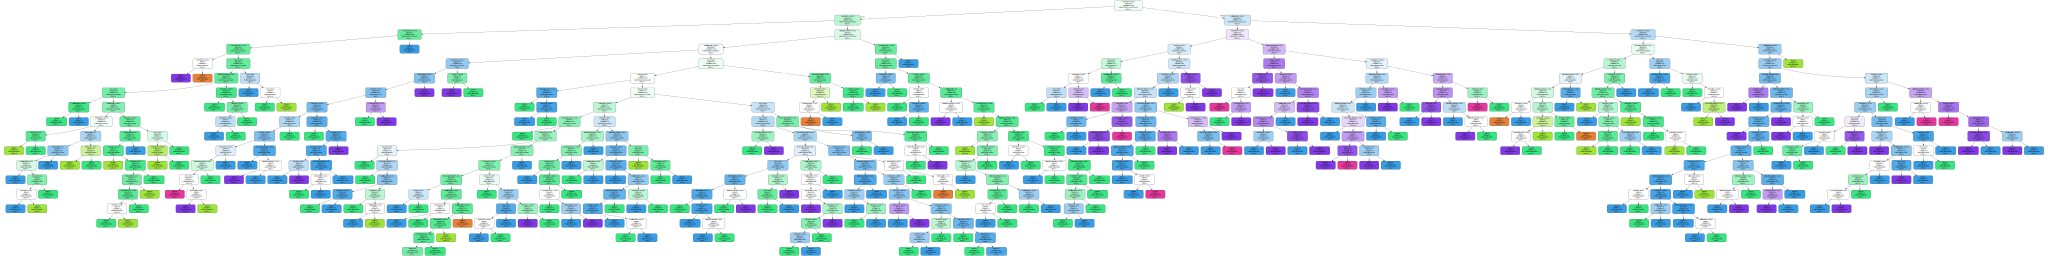

In [191]:
#Decision Tree Algorithm
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += ';' + r'C:\Users\Casper\anaconda3\Lib\site-packages\sphinx\templates\graphviz'
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=str(categories),
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph


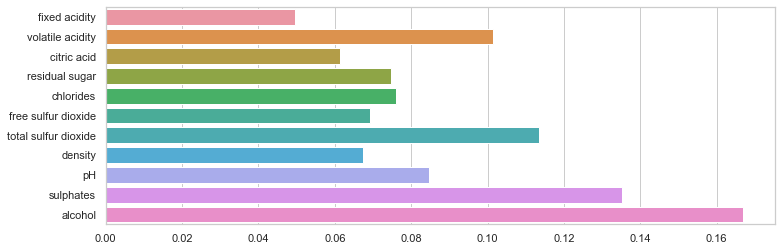

In [192]:
#Feature Importance
plt.figure(figsize=(12, 4))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [194]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.18      0.13      0.15        15
           2       0.69      0.71      0.70       208
           3       0.63      0.58      0.60       204
           4       0.37      0.51      0.43        45
           5       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.61      0.61      0.61       480



c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [195]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.31254686316215413
Recall = 0.32240237975532093
Accuracy = 0.60625
F1 Score = 0.3148135663690846


c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


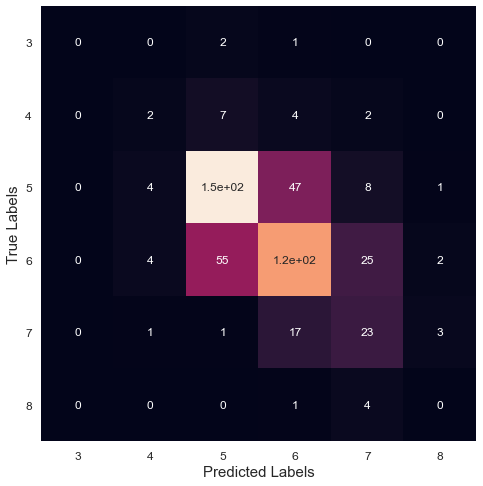

In [196]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [205]:
#XGBoost Algorithm 
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':17, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':6}

num_round = 6
model = xgb.train(param, dmatrix_train, num_round)

categories

[3, 4, 5, 6, 7, 8]

In [206]:
#Predictions
preds = model.predict(dmatrix_test)
preds[:10]

array([[3.9906506e-03, 6.1106668e-03, 9.3651736e-01, 4.1884817e-02,
        9.3067130e-03, 2.1897971e-03],
       [3.0763578e-02, 5.9972912e-02, 8.2954478e-01, 4.9660172e-02,
        2.0420333e-02, 9.6382024e-03],
       [3.1346464e-04, 3.7923327e-04, 5.9765897e-04, 5.4262676e-03,
        9.9269909e-01, 5.8423949e-04],
       [1.5635879e-03, 5.5638761e-03, 9.4831753e-01, 3.5931524e-02,
        6.6373092e-03, 1.9861537e-03],
       [8.3450619e-03, 3.5013740e-03, 9.1468340e-01, 6.1714288e-02,
        7.9245996e-03, 3.8312909e-03],
       [5.1680807e-04, 6.6394184e-04, 8.9387810e-01, 1.0355305e-01,
        7.3160586e-04, 6.5647741e-04],
       [4.5982883e-03, 5.7961857e-03, 8.2263666e-01, 1.5404457e-01,
        7.0833247e-03, 5.8409935e-03],
       [2.8774301e-03, 2.0671533e-03, 2.9814080e-03, 9.7496390e-01,
        1.6193110e-02, 9.1697706e-04],
       [1.2915596e-02, 8.4923081e-02, 8.7520456e-01, 1.5858194e-02,
        7.0521468e-03, 4.0464452e-03],
       [3.3879806e-03, 9.7798444e-03,

In [207]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 4, 4, 2, 2, 3, 3, 3,
       3, 4, 2, 2, 2, 4, 2, 3, 4, 2, 3, 2, 4, 4, 2, 2, 4, 3, 2, 3, 4, 4,
       3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 4,
       2, 2, 4, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 2,
       4, 2, 2, 2, 3, 3, 4, 2, 4, 2, 2, 3, 4, 4, 4, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 5, 2, 3, 3, 3, 4, 1, 3, 2, 3, 2, 2, 3, 4, 2, 2, 3, 4, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 3, 2, 2, 3, 4, 2, 3,
       3, 3, 1, 3, 3, 4, 2, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3,
       2, 4, 4, 2, 2, 4, 3, 4, 3, 2, 3, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 5, 4, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 4, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3,
       3, 1, 2, 2, 3, 4, 2, 2, 2, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 3, 3, 2,
       2, 2, 4, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 3,

In [208]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.3210665184289037
Recall = 0.3334506452153511
Accuracy = 0.6166666666666667


c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


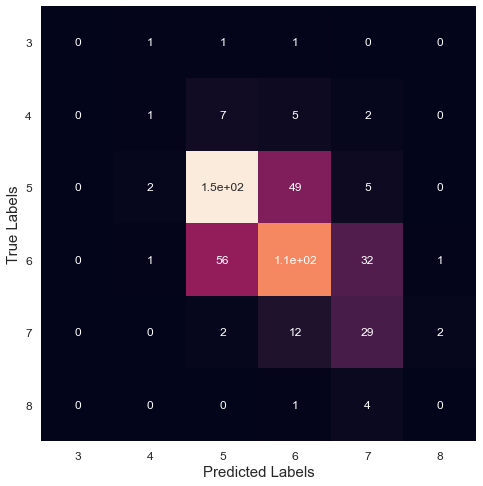

In [209]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [211]:
#GridSearchCV
from xgboost.sklearn import XGBClassifier
use_label_encoder=False #To fix an error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=17,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, eval_metric='mlogloss', seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Tuned: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 1000}
Mean of the cv scores is 0.651475
Train Score 0.994638
Test Score 0.660417
Seconds used for refitting the best model on the train dataset: 8.856161


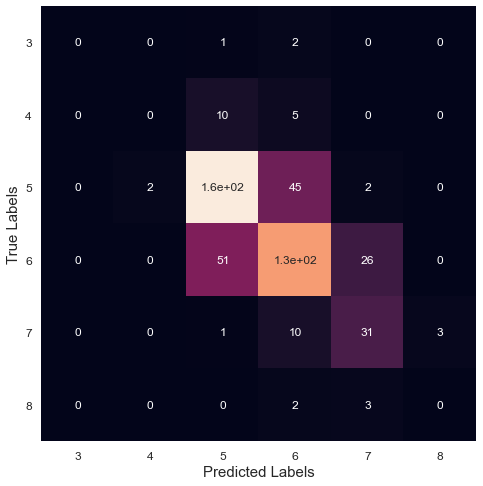

In [213]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [214]:
#RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
use_label_encoder=False #To fix an error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=17,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, eval_metric='mlogloss', seed=27)

clf = RandomizedSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

c:\users\casper\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Tuned: {'n_estimators': 190, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.01}
Mean of the cv scores is 0.624665
Train Score 0.957998
Test Score 0.672917
Seconds used for refitting the best model on the train dataset: 2.006002


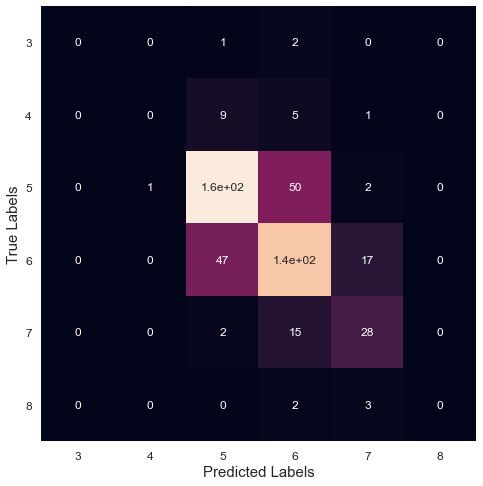

In [215]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Evaluation

**Best Algorithm for Train:** GridSearchCV
**Best Algorithm for Test:** RandomizedSearchCV
**Best Model for This Classification Problem:** XGBoost Algorithm using GridSearchCV